In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
df_annually = pd.read_csv("/Users/Ivan/Desktop/Projet_ML/PROJET-ML---INDEED/df_annually.csv")

In [4]:
label_1 = df_annually[df_annually["salary_label_3"]==1]
label_2 = df_annually[df_annually["salary_label_3"]==2]
label_3 = df_annually[df_annually["salary_label_3"]==3]
#label_3 = df_s[df_salary["salary_label"]==3]

In [5]:
def clean_title(title):
    title = word_tokenize(title)
    #desc = [word.lower() for word in desc if word.isalpha() and len(word)>2]
    title = [word.lower() for word in title if (word.isalpha() or word.isdigit()) and len(word)>2]
    title = [word for word in title if word not in stop_words]
    return title

In [6]:
stop_words = stopwords.words('french')
#tag_title_0 = label_0["Title"].apply(clean_title)
tag_title_1 = label_1["Title"].apply(clean_title)    
tag_title_2 = label_2["Title"].apply(clean_title)
tag_title_3 = label_3["Title"].apply(clean_title)

In [7]:
from collections import Counter
#result_0 = tag_title_0.apply(Counter).sum().items() # créer un dictionnaire avec la frequence de chaque mot de tag_title1
#result_0 = sorted(result_0, key=lambda kv : kv[1], reverse=True) #on va ordonner par la valeur du dictionnaire en ordre descendant

result_1 = tag_title_1.apply(Counter).sum().items()
result_1 = sorted(result_1, key=lambda kv : kv[1], reverse=True)

result_2 = tag_title_2.apply(Counter).sum().items()
result_2 = sorted(result_2, key=lambda kv : kv[1], reverse=True)

result_3 = tag_title_3.apply(Counter).sum().items()
result_3 = sorted(result_3, key=lambda kv : kv[1], reverse=True)

In [8]:
#result_series_0 = {k: v for k,v in result_0}
result_series_1 = {k: v for k,v in result_1}
result_series_2 = {k: v for k,v in result_2}
result_series_3 = {k: v for k,v in result_3}

In [9]:
#wordcloud_0 = WordCloud().generate_from_frequencies(result_series_0)
wordcloud_1 = WordCloud(max_words=100).generate_from_frequencies(result_series_1)
wordcloud_2 = WordCloud(max_words=100).generate_from_frequencies(result_series_2)
wordcloud_3 = WordCloud(max_words=100).generate_from_frequencies(result_series_3)

(-0.5, 399.5, 199.5, -0.5)

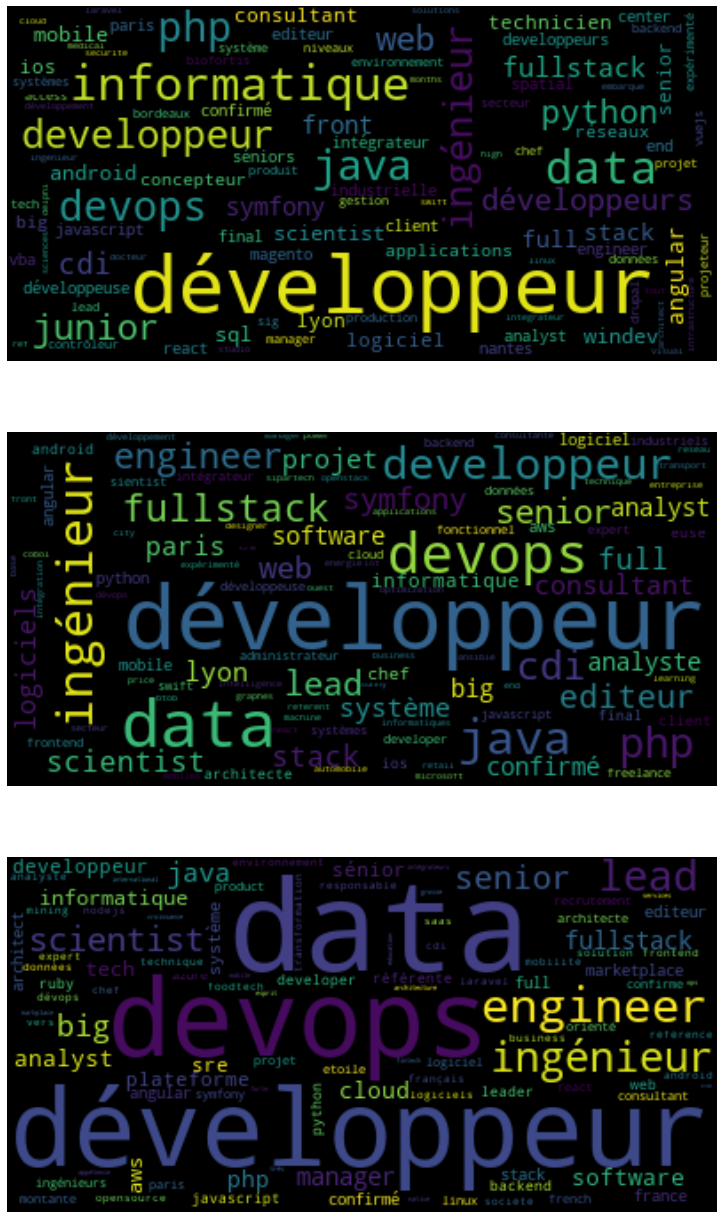

In [10]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (25, 30))

#plt.figure(1)
#plt.subplot(4, 1, 1)
#plt.imshow(wordcloud_0, interpolation="bilinear")
#plt.axis("off")

plt.subplot(4, 1, 2)
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 3)
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 4)
plt.imshow(wordcloud_3, interpolation="bilinear")
plt.axis("off")

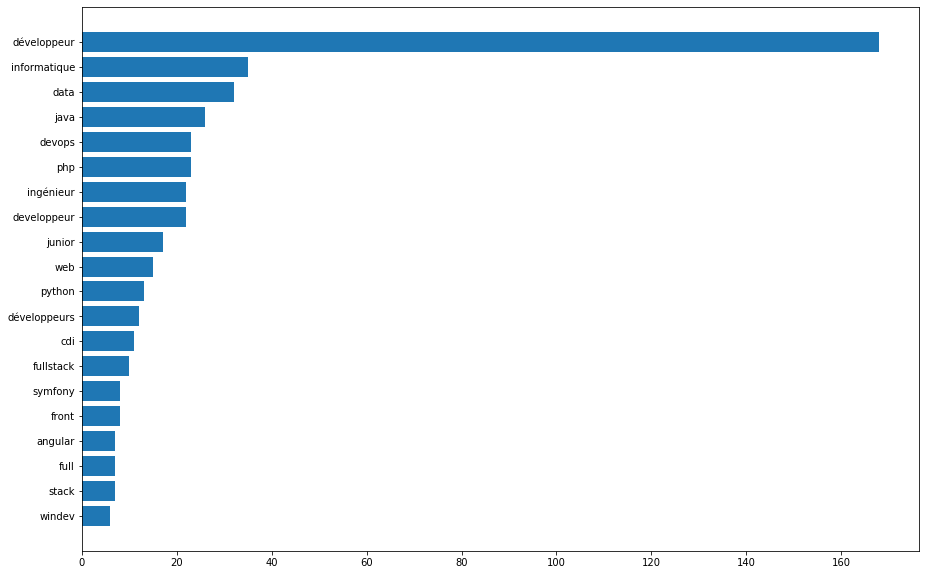

In [11]:
import matplotlib.pyplot as plt

count_title_1 = pd.DataFrame.from_dict(result_series_1, orient='index', columns = ["fréquence"]) [:20]
plt.figure(figsize=(15,10))
plt.barh(count_title_1.index, count_title_1["fréquence"])
plt.gca().invert_yaxis()  # labels read top-to-bottom
#plt.xticks(rotation=90)
#count_title_1.fréquence
plt.show()

In [12]:
def clean_summary(desc):
    desc = word_tokenize(desc)
    #desc = [word.lower() for word in desc if word.isalpha() and len(word)>2]
    desc = [word.lower() for word in desc if (word.isalpha() or word.isdigit()) and len(word)>1]
    desc = [word for word in desc if (word not in stop_words_en) and (word not in stop_words_fr)]
    return desc

In [13]:
#stopwords
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')

In [14]:
#tag_desc_0 = label_0["Description"].apply(clean_summary)
tag_desc_1 = label_1["Description"].apply(clean_summary)    
tag_desc_2 = label_2["Description"].apply(clean_summary)
tag_desc_3 = label_3["Description"].apply(clean_summary)

In [15]:
#desc_0 = tag_desc_0.apply(Counter).sum().items()
#desc_0 = sorted(desc_0, key=lambda kv : kv[1], reverse=True) 
#dict_desc_0 = {k: v for k,v in desc_0}


desc_1 = tag_desc_1.apply(Counter).sum().items()
desc_1 = sorted(desc_1, key=lambda kv : kv[1], reverse=True) 
dict_desc_1 = {k: v for k,v in desc_1}

desc_2 = tag_desc_2.apply(Counter).sum().items()
desc_2 = sorted(desc_2, key=lambda kv : kv[1], reverse=True) 
dict_desc_2 = {k: v for k,v in desc_2}

desc_3 = tag_desc_3.apply(Counter).sum().items()
desc_3 = sorted(desc_3, key=lambda kv : kv[1], reverse=True) 
dict_desc_3 = {k: v for k,v in desc_3}

(-0.5, 399.5, 199.5, -0.5)

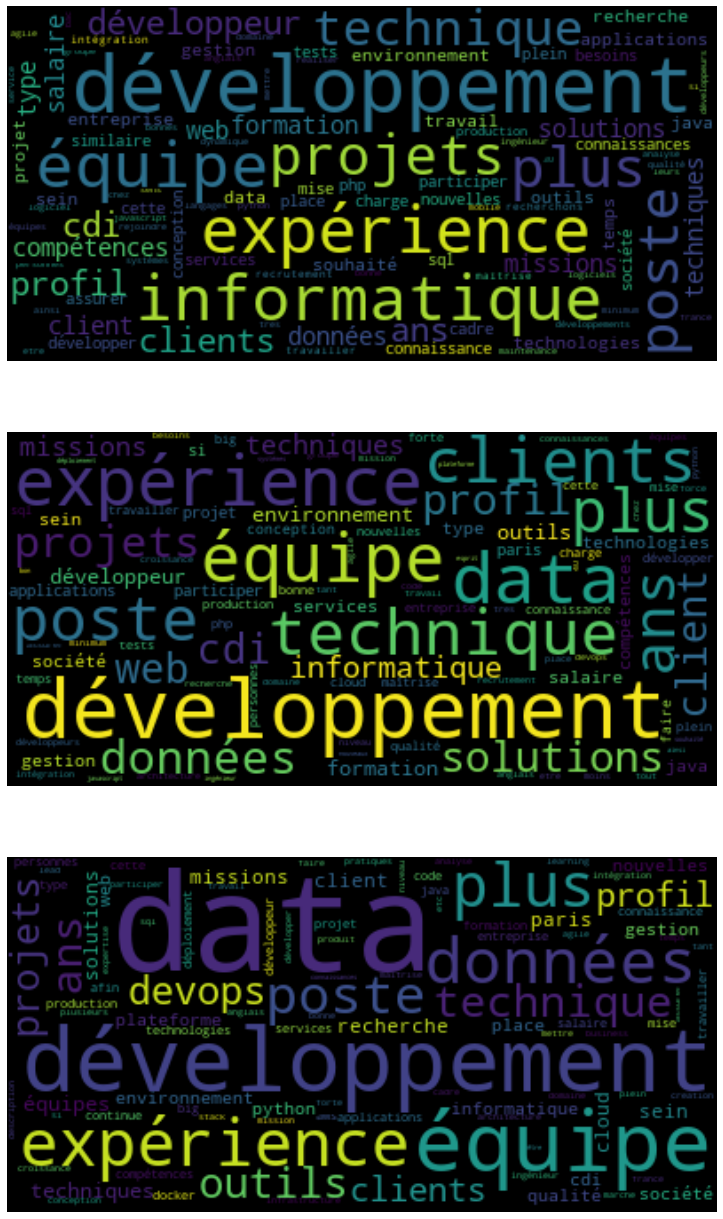

In [16]:
#wordcloud5 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_0)
wordcloud6 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_1)
wordcloud7 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_2)
wordcloud8 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_3)

figure = plt.figure(figsize = (25, 30))
#plt.figure(1)
#plt.subplot(4, 1, 1)
#plt.imshow(wordcloud5, interpolation="bilinear")
#plt.axis("off")

plt.subplot(4, 1, 2)
plt.imshow(wordcloud6, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 3)
plt.imshow(wordcloud7, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 4)
plt.imshow(wordcloud8, interpolation="bilinear")
plt.axis("off")